# Setup

In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(1, '../scripts/02_plant_optimization')
from plant_optimization import *
from plant_optimization.notebook_tools import *

In [2]:
def preview(dataframe, head=5):
    display(dataframe.head(head))
    print("This dataframe has " + str(len(dataframe)) + " observations.")

# Cheapest Fuel

<font color=red> This site is on a glacier

In [3]:
site1 = Site((64.5,-16.250),'Iceland')
plant1 = Plant(site1)

In [4]:
optimize_plant(plant1,silent=False,print_status=True,timelimit=1200,DisplayInterval=30)

Using license file /Users/kyleseymour/gurobi.lic
Academic license - for non-commercial use only
Changed value of parameter timelimit to 1200.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Changed value of parameter MIPGap to 0.001
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
Changed value of parameter DisplayInterval to 30
   Prev: 5  Min: 1  Max: 2000000000  Default: 5
Gurobi Optimizer version 9.0.2 build v9.0.2rc0 (mac64)
Optimize a model with 149335 rows, 105419 columns and 502164 nonzeros
Model fingerprint: 0xaf603060
Variable types: 105411 continuous, 8 integer (0 binary)
Coefficient statistics:
  Matrix range     [3e-07, 3e+03]
  Objective range  [1e-02, 8e+06]
  Bounds range     [1e+05, 1e+12]
  RHS range        [1e+01, 1e+01]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.
Presolve removed 10104 rows and 27392 columns
Presolve time: 1.37s
Presolved: 139231 rows, 78027 columns, 420603 nonzeros
Variable types: 

In [5]:
unpack_design_solution(plant1,unpack_operation=True)
print_solution_summary(plant1)

Installed wind capacity -- 6.0 MW (2 turbines).
Installed PV capacity -- 8.518 MW.
Installed electrolyzer capacity -- 6.009 MW electric.
Installed CO2 capture capacity -- 650.0 kg/hr.
Installed hydrogen-to-liquid component capacity -- 1.157 MW.
Installed battery capacity -- 24.039 MWh.
Installed hydrogen storage tank capacity -- 1000.0 MWh.
Installed CO2 storage tank capacity -- 64.065 tons.
Total curtailed electricity (yearly): 1.4389842687430856 GWh
-----
Net present value of plant -- 52.4 million EUR.
CAPEX of plant -- 32.2 million EUR
Levelized cost of fuel -- 174.60 EUR/MWh (1.67 EUR/liter).


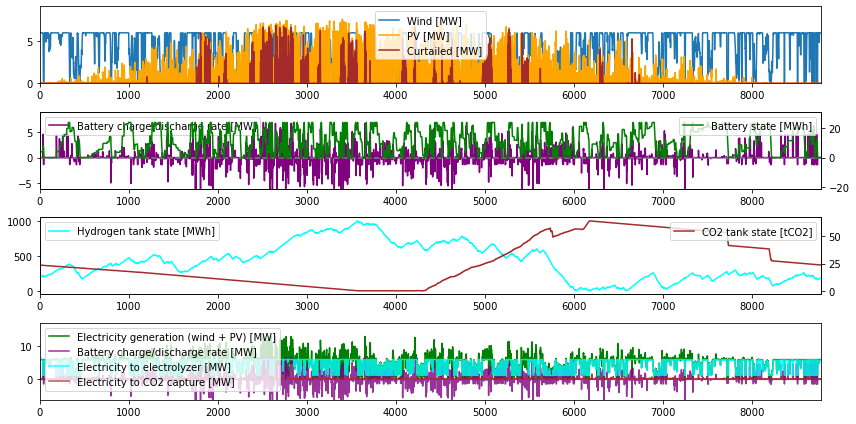

In [12]:
plot_plant_operation(plant1,fuel_rate=False,figsize=(12,6))#,xlim=(4025,4050))
plt.savefig('../gfx/cheapest_plant_operation.png',dpi=400);

# Most Expensive Fuel

In [13]:
site4 = Site((46.0,9.375),'Italy')
plant4 = Plant(site4)

In [14]:
optimize_plant(plant4,silent=False,print_status=True,timelimit=1200,DisplayInterval=30)

Changed value of parameter timelimit to 1200.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Changed value of parameter MIPGap to 0.001
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
Changed value of parameter DisplayInterval to 30
   Prev: 5  Min: 1  Max: 2000000000  Default: 5
Gurobi Optimizer version 9.0.2 build v9.0.2rc0 (mac64)
Optimize a model with 149335 rows, 105419 columns and 500571 nonzeros
Model fingerprint: 0xd5a3d109
Variable types: 105411 continuous, 8 integer (0 binary)
Coefficient statistics:
  Matrix range     [3e-07, 2e+03]
  Objective range  [1e-02, 4e+06]
  Bounds range     [1e+05, 1e+12]
  RHS range        [1e+01, 1e+01]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.
Presolve removed 11873 rows and 28795 columns
Presolve time: 1.63s
Presolved: 137462 rows, 76624 columns, 415716 nonzeros
Variable types: 76616 continuous, 8 integer (0 binary)

Deterministic concurrent LP optimizer: primal and dual s

In [15]:
unpack_design_solution(plant4,unpack_operation=True)
print_solution_summary(plant4)

Installed wind capacity -- 188.6 MW (82 turbines).
Installed PV capacity -- 182.723 MW.
Installed electrolyzer capacity -- 8.624 MW electric.
Installed CO2 capture capacity -- 824.0 kg/hr.
Installed hydrogen-to-liquid component capacity -- 1.1919999996425887 MW.
Installed battery capacity -- 261.374 MWh.
Installed hydrogen storage tank capacity -- 1000.0 MWh.
Installed CO2 storage tank capacity -- 1000.0 tons.
Total curtailed electricity (yearly): 131.8424204657515 GWh
-----
Net present value of plant -- 677.7 million EUR.
CAPEX of plant -- 474.8 million EUR
Levelized cost of fuel -- 2258.87 EUR/MWh (21.58 EUR/liter).


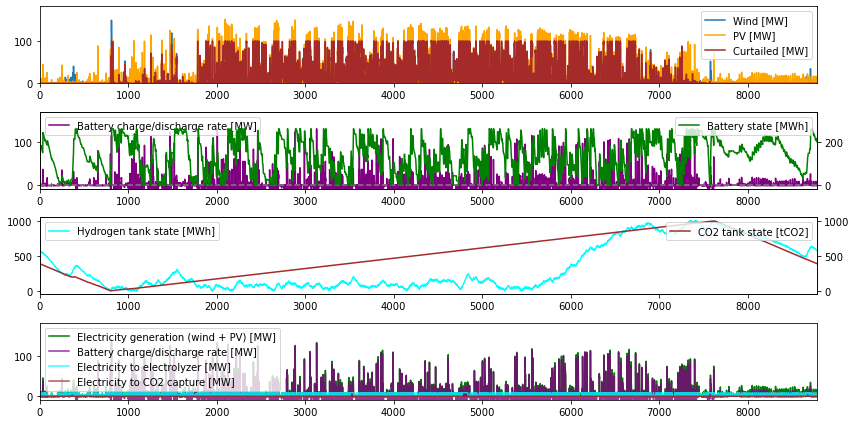

In [17]:
plot_plant_operation(plant4,fuel_rate=False,figsize=(12,6))#,xlim=(4025,4050))
plt.savefig('../gfx/expensive_plant_operation.png',dpi=400);

In [11]:
plant4.operation.reset_index(drop=True).iloc[2800:2850][['H2_el_MWh','CO2_el_MWh','battery_chr_MWh','wind_production_MWh','PV_production_MWh','curtailed_el_MWh']]

,H2_el_MWh,CO2_el_MWh,battery_chr_MWh,wind_production_MWh,PV_production_MWh,curtailed_el_MWh
2800,8.6240,0.2472,0.00000,0.113899,66.891236,58.133935
2801,8.6240,0.2472,0.00000,0.071955,1.701151,1.773106
2802,1.7248,0.2472,0.00000,0.132680,0.000000,0.132680
2803,8.6240,0.2472,0.00000,0.161409,0.000000,0.161409
2804,8.6240,0.2472,0.00000,0.148553,0.000000,0.148553
2805,8.6240,0.2472,0.00000,0.138968,0.000000,0.138968
2806,8.6240,0.2472,0.00000,0.133682,0.000000,0.133682
2807,8.6240,0.2472,0.00000,0.138621,0.000000,0.138621
2808,8.6240,0.2472,0.00000,0.143939,0.000000,0.143939
2809,8.6240,0.2472,0.00000,0.116756,0.000000,0.116756
